<a href="https://colab.research.google.com/github/qKTPq/2110574-AI4ENG/blob/main/KTP_Machine_Learning_Pipelin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/AI4ENG - KTP/dataset/Breast_Cancer.csv'
df = pd.read_csv(file_path)
display(df.head(3))
display(df.info())

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('Status', axis=1)
y = df['Status']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[617  68]
 [ 61  59]]

Overall Accuracy: 0.8398


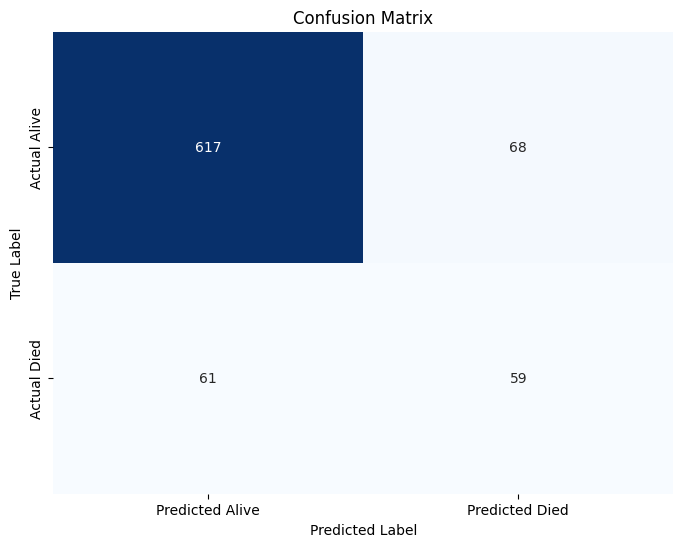

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Alive', 'Predicted Died'],
            yticklabels=['Actual Alive', 'Actual Died'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Precision (Alive): 0.9100
Recall (Alive): 0.9007
F1-score (Alive): 0.9054


/tmp/ipython-input-1229957492.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


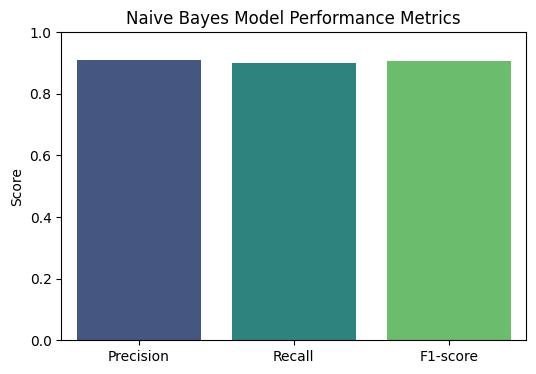

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate Precision, Recall, and F1-score
# Assuming 'Alive' is the positive class based on the confusion matrix
precision = precision_score(y_test, y_pred, pos_label='Alive')
recall = recall_score(y_test, y_pred, pos_label='Alive')
f1 = f1_score(y_test, y_pred, pos_label='Alive')

print(f"Precision (Alive): {precision:.4f}")
print(f"Recall (Alive): {recall:.4f}")
print(f"F1-score (Alive): {f1:.4f}")

# Plot Precision, Recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Naive Bayes Model Performance Metrics')
plt.show()